Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption .

In [620]:
# Import data wrangling libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime

## Wrangle Data

In [621]:
# Load and show data dictionary
filename = 'takehome_users.csv'
users = pd.read_csv(filename,encoding='latin-1', parse_dates=['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')
pd.set_option('display.max_colwidth', -1)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [622]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [623]:
# Load and show data dictionary
filename = 'takehome_user_engagement.csv'
engage = pd.read_csv(filename,encoding='latin-1', parse_dates=['time_stamp'])

pd.set_option('display.max_colwidth', -1)
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [624]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


## Adopted User

"adopted user" as a user who has logged into the product on three separate days in at least one seven day period,

In [625]:
# Add week and day features based on time_stamp
engage['week'] = engage.time_stamp.dt.week
engage['day'] = engage.time_stamp.dt.day
engage.head()

,time_stamp,user_id,visited,week,day
0,2014-04-22 03:53:30,1,1,17,22
1,2013-11-15 03:45:04,2,1,46,15
2,2013-11-29 03:45:04,2,1,48,29
3,2013-12-09 03:45:04,2,1,50,9
4,2013-12-25 03:45:04,2,1,52,25


In [626]:
# Group by week and user id, then find the number of unique days greater than or equal to 3
adopted = pd.DataFrame(engage.groupby(['week', 'user_id'])['day'].nunique()>=3)

# obtain a list of adopted users
adopted = adopted.loc[adopted['day']== True].reset_index()
adopted = list(adopted.user_id)
print('Number of Adopted Users: {}'.format(len(adopted)))
print('Number of Total Users: {}'.format(len(engage)))
print('Percentage: {:.2f}%'.format(len(adopted)/len(engage)*100))

Number of Adopted Users: 29616
Number of Total Users: 207917
Percentage: 14.24%


In [627]:
# Add new feature called 'adopted' as a boolean based on if a user is an adopted user
users['adopted'] = users['object_id'].isin(adopted)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False


## Factors Predicting User Adoption

1) **Recent session creation time**: average adoptions substantially increased for May and June of 2014 by over eight times previous months. A closer look into customer success/acquisition strategies implemented during this time would be beneficial to further gain insights.

2) **Creation source**: The top three ways that adopted users created their accounts are through guest invites, Google authentication and sign-up via website.

3) **Domain**: Hotmail and Gmail are the most popular domains for adopted users.

4) **Company Size**: Adopted users tend to work in smaller organizations, as opposed to larger organizations.

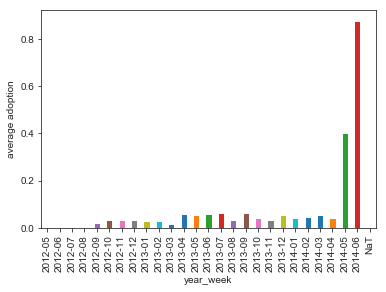

In [628]:
# Plot average adoption by month
users['year_week'] = users.last_session_creation_time.dt.strftime('%Y-%m')
users.groupby(['year_week'])['adopted'].mean().plot(kind='bar')
plt.ylabel('average adoption')
plt.show()

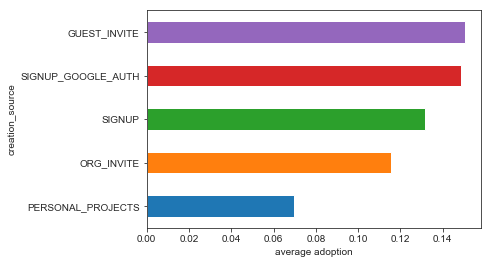

In [629]:
# Plot average adoption by creation source 
users.groupby(['creation_source'])['adopted'].mean().sort_values(0).plot(kind='barh')
plt.xlabel('average adoption')
plt.show()

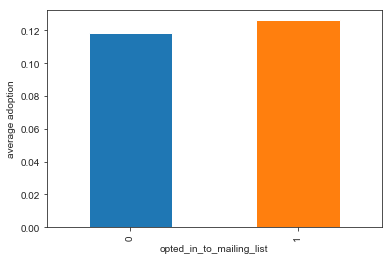

In [630]:
# Plot average adoption by whether or not the user opted in a mailing list
users.groupby(['opted_in_to_mailing_list'])['adopted'].mean().plot(kind='bar')
plt.ylabel('average adoption')
plt.show()

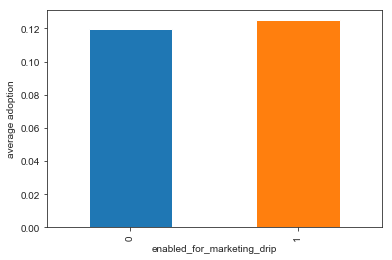

In [631]:
# Plot average adoption by whether or not the user enabled a marketing drip
users.groupby(['enabled_for_marketing_drip'])['adopted'].mean().plot(kind='bar')
plt.ylabel('average adoption')
plt.show()

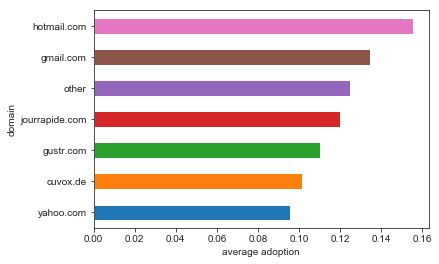

In [632]:
# Plot average adoption by domain
users['domain'] = users['email'].str.split("@").str[1]
other = (users['domain'] != 'gmail.com') & (users['domain'] != 'yahoo.com') & (users['domain'] != 'jourrapide.com')\
        & (users['domain'] != 'cuvox.de') & (users['domain'] != 'gustr.com') & (users['domain'] != 'hotmail.com')
users.loc[other, 'domain'] = 'other'
users.groupby('domain')['adopted'].mean().sort_values(0).plot(kind='barh')
plt.xlabel('average adoption')
plt.show()

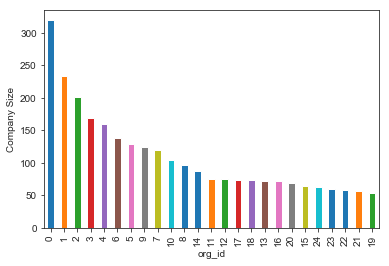

In [633]:
# Plot company size by org_id
company_size = users.groupby('org_id')['object_id'].count()[0:25].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Company Size')
plt.show()

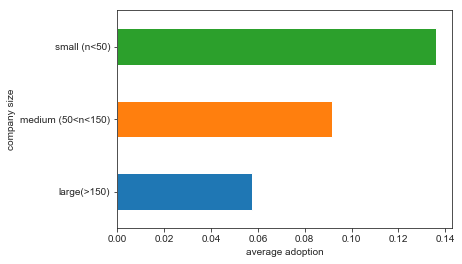

In [634]:
# Plot average adoption by company size
company_size = pd.DataFrame(users.groupby('org_id')['object_id'].count()).reset_index(0)
users['company_size'] = users.groupby('org_id').transform('count')['object_id']
small = users['company_size'] <50
medium = (users['company_size'] >=50) & (users['company_size'] <150)
large = users['company_size'] >=150
users.loc[small,'company_size'] = 'small (n<50)'
users.loc[medium,'company_size'] = 'medium (50<n<150)'
users.loc[large,'company_size'] = 'large(>150)'
users.groupby('company_size')['adopted'].mean().plot(kind='barh')
plt.ylabel('company size')
plt.xlabel('average adoption')
plt.show()